# Market Basket Analysis with Python

## Table of Contents

1. Introduction
2. Feature Engineering
3. Association Rule Mining
4. Rule Visualization

## Introduction

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [11]:
df = pd.read_csv("Market Basket Analysis - Groceries_dataset.csv")

In [12]:
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [13]:
df.shape

(38765, 3)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [15]:
df.describe(include="all")

,Member_number,Date,itemDescription
count,38765.000000,38765,38765
unique,NaN,728,167
top,NaN,21-01-2015,whole milk
freq,NaN,96,2502
mean,3003.641868,NaN,NaN
std,1153.611031,NaN,NaN
min,1000.000000,NaN,NaN
25%,2002.000000,NaN,NaN
50%,3005.000000,NaN,NaN
75%,4007.000000,NaN,NaN


## Feature Engineering

In [28]:
# Merge date and member_number columns to form a compound column

df["row_id"] = df["Member_number"].astype(str) + " " + df["Date"]

In [17]:
df.head()

,Member_number,Date,itemDescription,row_id
0,1808,21-07-2015,tropical fruit,1808 21-07-2015
1,2552,05-01-2015,whole milk,2552 05-01-2015
2,2300,19-09-2015,pip fruit,2300 19-09-2015
3,1187,12-12-2015,other vegetables,1187 12-12-2015
4,3037,01-02-2015,whole milk,3037 01-02-2015


In [29]:
# Create a dataset that maps the frequency of each item

encoded_df = pd.crosstab(df["row_id"], df["itemDescription"])

In [19]:
encoded_df.head()

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
row_id,,,,,,,,,,,,,,,,,,,,,
1000 15-03-2015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1000 24-06-2014,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1000 24-07-2015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000 25-11-2015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000 27-05-2015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
encoded_df.describe()

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
count,14963.000000,14963.000000,14963.000000,14963.000000,14963.000000,14963.000000,14963.000000,14963.000000,14963.000000,14963.000000,...,14963.000000,14963.000000,14963.000000,14963.000000,14963.000000,14963.000000,14963.000000,14963.000000,14963.000000,14963.000000
mean,0.004010,0.021587,0.001470,0.001938,0.000200,0.000267,0.008153,0.001136,0.034485,0.021854,...,0.005347,0.003408,0.018713,0.044242,0.000535,0.024193,0.011762,0.167212,0.089153,0.004010
std,0.063199,0.146707,0.038317,0.043983,0.014159,0.016348,0.090671,0.033689,0.185385,0.146668,...,0.072927,0.058284,0.136985,0.208224,0.023117,0.154953,0.108436,0.398805,0.296695,0.063199
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,2.000000,...,1.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,4.000000,3.000000,1.000000


In [20]:
encoded_df.shape

(14963, 167)

In [23]:
def normalize(frequency):
    """
    Description:
        - This functions accepts the frequency of each column and normalizes it to 0 or 1.
          The output is 1 if the frequency is greater than 0, otherwise it is 0.
    Input:
        - frequency <int>: Frequency of the item
    
    Output:
        - result <int>: Normalized frequency
    """

    if frequency > 0:
        result = 1
    else:
        result = 0
        
    return result

In [24]:
# Normalize the frequency

basket_input = encoded_df.applymap(normalize)

## Association Rule Mining

In [25]:
frequent_itemsets = apriori(basket_input, min_support = 0.001, use_colnames = True)

rules = association_rules(frequent_itemsets, metric = "lift")

c:\Users\Ifeoluwa\miniconda3\envs\miniml\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [26]:
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(UHT-milk),(bottled water),0.021386,0.060683,0.001069,0.050000,0.823954,-0.000228,0.988755,-0.179204
1,(bottled water),(UHT-milk),0.060683,0.021386,0.001069,0.017621,0.823954,-0.000228,0.996168,-0.185312
2,(UHT-milk),(other vegetables),0.021386,0.122101,0.002139,0.100000,0.818993,-0.000473,0.975443,-0.184234
3,(other vegetables),(UHT-milk),0.122101,0.021386,0.002139,0.017515,0.818993,-0.000473,0.996060,-0.201119
4,(UHT-milk),(sausage),0.021386,0.060349,0.001136,0.053125,0.880298,-0.000154,0.992371,-0.121998


In [27]:
rules.sort_values(["support", "confidence", "lift", "leverage", "conviction"], axis = 0, ascending = False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
622,(rolls/buns),(whole milk),0.110005,0.157923,0.013968,0.126974,0.804028,-0.003404,0.964550,-0.214986
623,(whole milk),(rolls/buns),0.157923,0.110005,0.013968,0.088447,0.804028,-0.003404,0.976350,-0.224474
695,(yogurt),(whole milk),0.085879,0.157923,0.011161,0.129961,0.822940,-0.002401,0.967861,-0.190525
694,(whole milk),(yogurt),0.157923,0.085879,0.011161,0.070673,0.822940,-0.002401,0.983638,-0.203508
550,(soda),(other vegetables),0.097106,0.122101,0.009691,0.099794,0.817302,-0.002166,0.975219,-0.198448
551,(other vegetables),(soda),0.122101,0.097106,0.009691,0.079365,0.817302,-0.002166,0.980729,-0.202951
649,(sausage),(whole milk),0.060349,0.157923,0.008955,0.148394,0.939663,-0.000575,0.988811,-0.063965
648,(whole milk),(sausage),0.157923,0.060349,0.008955,0.056708,0.939663,-0.000575,0.996140,-0.070851
625,(yogurt),(rolls/buns),0.085879,0.110005,0.007819,0.091051,0.827697,-0.001628,0.979147,-0.185487
624,(rolls/buns),(yogurt),0.110005,0.085879,0.007819,0.071081,0.827697,-0.001628,0.984071,-0.189562


# Rule Visualization

C:\Users\Ifeoluwa\AppData\Local\Temp\ipykernel_9288\39762100.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


<Axes: xlabel='antecedent support', ylabel='consequent support'>

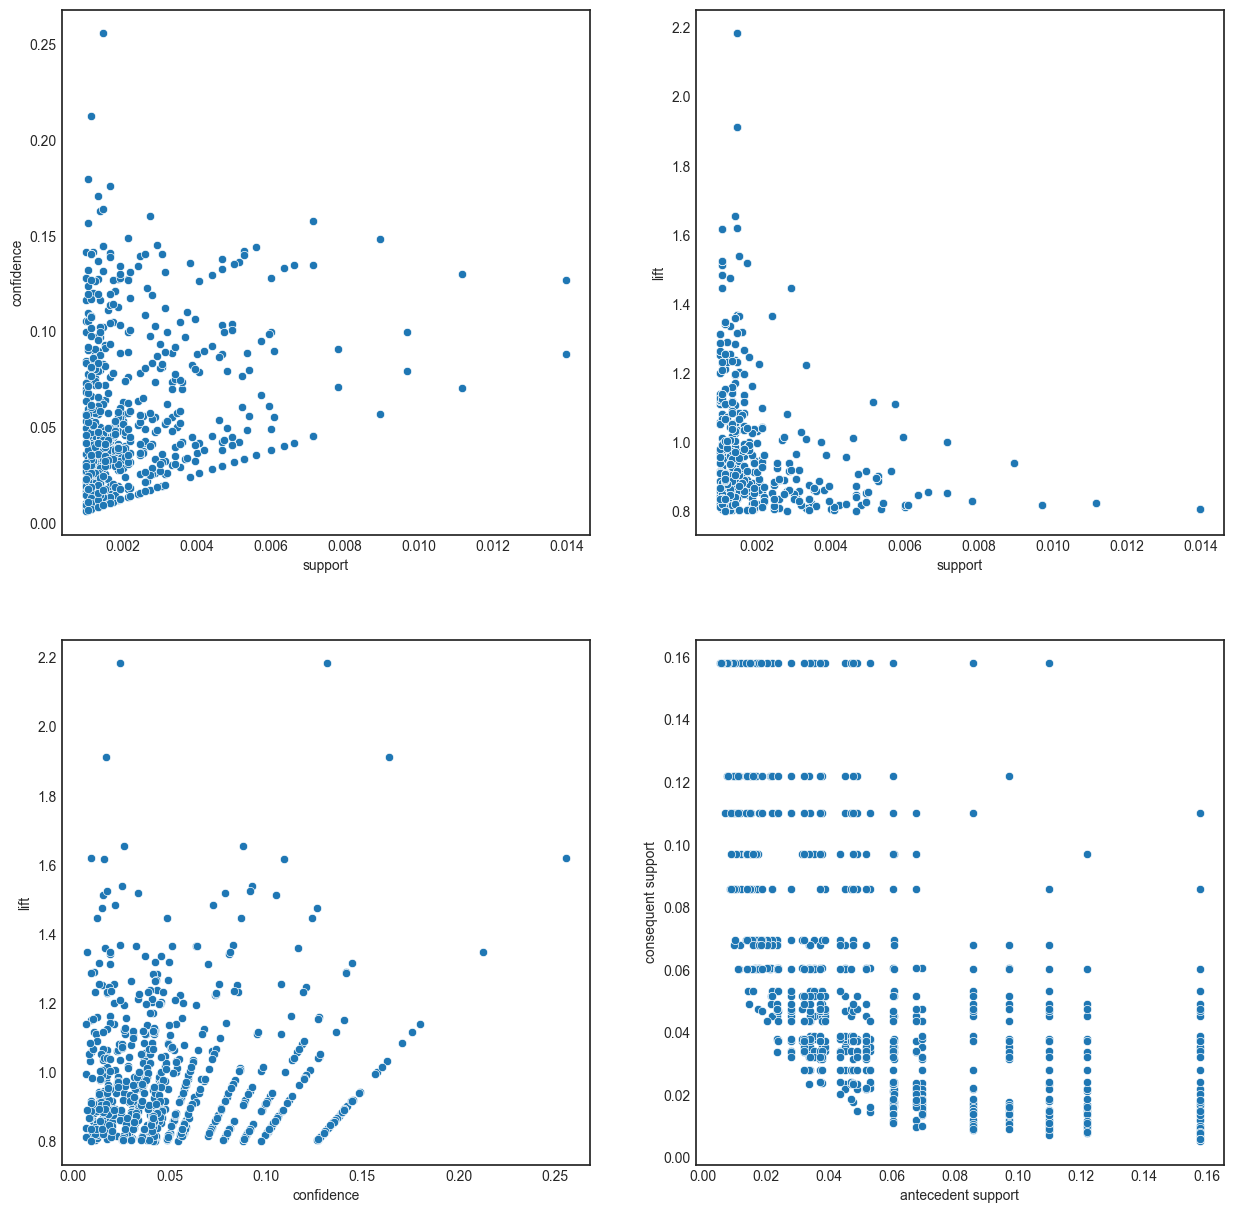

In [30]:
plt.figure(figsize = (15, 15))
plt.style.use('seaborn-white')


plt.subplot(221)
sns.scatterplot(x="support", y="confidence",data=rules)

plt.subplot(222)
sns.scatterplot(x="support", y="lift",data=rules)

plt.subplot(223)
sns.scatterplot(x="confidence", y="lift",data=rules)

plt.subplot(224)
sns.scatterplot(x="antecedent support", y="consequent support",data=rules)

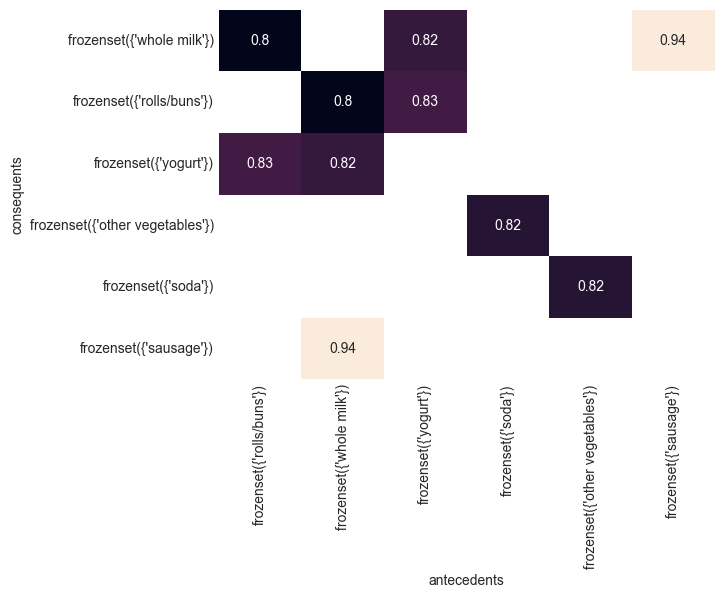

In [38]:
# Visualizing lift with heatmaps

pivot = rules.sort_values(["support", "confidence", "lift", "leverage", "conviction"], axis = 0, ascending = False).head(10).pivot(index = 'consequents', columns = 'antecedents', values= 'lift')

sns.heatmap(pivot, annot = True, cbar = False)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

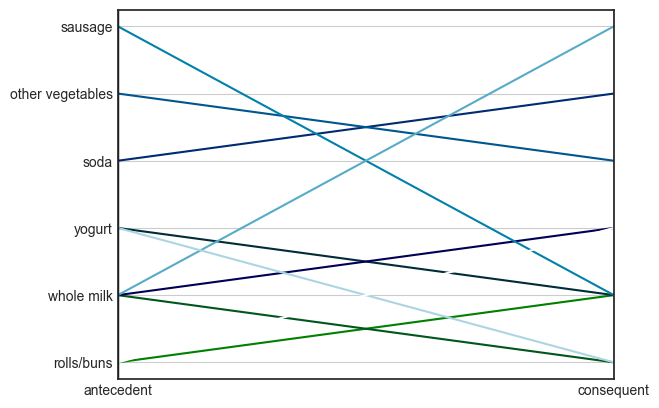

In [39]:
# Visualizing parallel coordinates

def rules_to_coordinates(rules):
    rules['antecedent'] = rules['antecedents'].apply(lambda antecedent:list(antecedent)[0])
    rules['consequent'] = rules['consequents'].apply(lambda consequent:list(consequent)[0])
    rules['rule'] = rules.index
    return rules[['antecedent','consequent','rule']]

coords = rules_to_coordinates(rules.sort_values(["support", "confidence", "lift", "leverage", "conviction"], axis = 0, ascending = False).head(10))

pd.plotting.parallel_coordinates(coords, 'rule', colormap='ocean')
plt.legend([])
plt.show()